## Natural Language Processing - Yelp Reviews

## Import libraries and dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
yelp_df=pd.read_csv('C:/Users/user/Downloads/DL+and+ML+Practical+Tutorials+-+Package/DL and ML Practical Tutorials - Package/Project 7/yelp.csv')

In [5]:
yelp_df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [6]:
yelp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
business_id    10000 non-null object
date           10000 non-null object
review_id      10000 non-null object
stars          10000 non-null int64
text           10000 non-null object
type           10000 non-null object
user_id        10000 non-null object
cool           10000 non-null int64
useful         10000 non-null int64
funny          10000 non-null int64
dtypes: int64(4), object(6)
memory usage: 781.3+ KB


In [7]:
yelp_df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [8]:
yelp_df.shape

(10000, 10)

In [9]:
yelp_df['text'][0]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

In [10]:
yelp_df['text'][1]

'I have no idea why some people give bad reviews about this place. It goes to show you, you can please everyone. They are probably griping about something that their own fault...there are many people like that.\n\nIn any case, my friend and I arrived at about 5:50 PM this past Sunday. It was pretty crowded, more than I thought for a Sunday evening and thought we would have to wait forever to get a seat but they said we\'ll be seated when the girl comes back from seating someone else. We were seated at 5:52 and the waiter came and got our drink orders. Everyone was very pleasant from the host that seated us to the waiter to the server. The prices were very good as well. We placed our orders once we decided what we wanted at 6:02. We shared the baked spaghetti calzone and the small "Here\'s The Beef" pizza so we can both try them. The calzone was huge and we got the smallest one (personal) and got the small 11" pizza. Both were awesome! My friend liked the pizza better and I liked the ca

In [11]:
yelp_df['text'][999]

"IKEA is so much fun. It's a little bit of a walk up and down the store but with all the different items on display there is time to sit and relax on the chairs, couches, beds. I love walking around the store looking a new ideas for my own home. They have very good prices on all household items. When shopping for accessories for the house I highly recommend going to IKEA because you are bound to find something. Simple things such as Tupperware, trash cans, bathroom accessories can all be found at a really good price."

In [12]:
yelp_df['text'][998]

"Mouth watering. That's all I have to say.\n\nThe food at this place is seriously amazing. Everything we tasted was better than the dish before it, and we had a fabulous bottle of white wine to accompany our meal. The scallops were a highlight, as was the potato pie dish (that's not a very technical name for what it was, but that's my best effort). It was all very, very good, and the only thing keeping us from returning is the cost! We genuinely enjoyed our evening here, and we will absolutely go back, but it is pricey, especially for the size of the dishes.\n\nThe atmosphere and ambiance are so fun, and this place is a little dressier and trendier than some other places we've been in Scottsdale. I highly recommend this for a night out with friends, or a cool date night. It seemed as though reservations would be a good idea, although we didn't have them and were okay (it was busy, though)."

## Step 2: Data visualization

In [13]:
yelp_df['Length'] = yelp_df['text'].apply(len)

In [14]:
yelp_df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,Length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


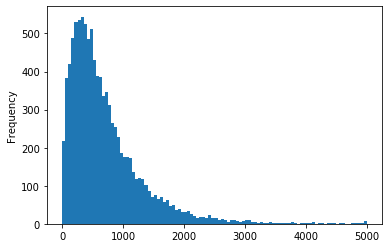

In [15]:
yelp_df['Length'].plot(bins= 100,kind= 'hist')

In [16]:
yelp_df['Length'].describe()

count    10000.000000
mean       710.738700
std        617.399827
min          1.000000
25%        294.000000
50%        541.500000
75%        930.000000
max       4997.000000
Name: Length, dtype: float64

In [17]:

yelp_df[yelp_df['Length'] == 4997]['text'].iloc[0]

'In our continuing quest to identify cool, locally owned places to eat and/or drink, Caroline and I auditioned Vintage 95 last night. \n\nBefore I go further, understand that whenever I go out for eats or drinks, I have  in  mind a Platonic Ideal of the Bar/Pub/Eatery I most want to frequent. I\'m on a constant quest to find that  Ideal expressed in Real Life. \n\nVintage 95 isn\'t quite there, but it\'s damn close. If I ever give something Five Stars, you\'ll know it has pegged my Platonic Ideal. Anyway...\n\nThe plan last night was for drinks. No plans for food, just Adult Beverages and warm conversation. But it turned into more.\n\nThe location in downtown Chandler is terrific for us. The owners have created a very fine visual experience - leather, stone, dark woods, good lighting. And they don\'t have the music turned up so loud that you CANNOT HAVE A CONVERSATION. This is one of my pet peeves. If I want to stare at people move their mouths while enduring an aural assault, I\'ll st

In [18]:
yelp_df[yelp_df['Length']== 1]['text'].iloc[0]

'X'

In [19]:
yelp_df[yelp_df['Length']== 710]['text'].iloc[0]

"I went here for lunch a couple of weeks ago with my bosses. It was packed on a Friday - we sat at the bar and our cook was fantastic! We got to sit and chat with him while he worked away at the orders. I had the chicken pesto pasty and it was wonderful! the bread used is similar to a pastry dough type...but not as sweet. The pasty was so filling, I could barely finish it.\n\nMy bosses have been there before and have always wanted to try the peanut butter and jelly pasty - so we all split it as dessert and it was so good. They put bananas in it and drizzle jelly over the whole pasty. It's definitely rich and gooey. \n\nI would totally go back here again and have told my friends about it too! Amazing place."

In [20]:
yelp_df[yelp_df['Length']== 711]['text'].iloc[0]

'I\'m from Chicago so I\'m picky with my pizza--this place does it right (NY style)! I love the "hole in the wall" feel. Every customer that walked in was a regular which was a good sign. I ordered the Mozzarella sticks and a large Monster Pie (Sausage, pepperoni, bell peppers, onion and cheese). The mozzarella sticks took a little while to come out but they were cooked to perfection. They also threw in a few garlic knots which was awesome. The pizza was unbelievable--I think the crumbled sausage really did it! They have great deals like large pie & 20 wings for $20 which I definitely will be taking advantage of during football games on Sunday. Glad to have found a new place where I can also be a regular!'

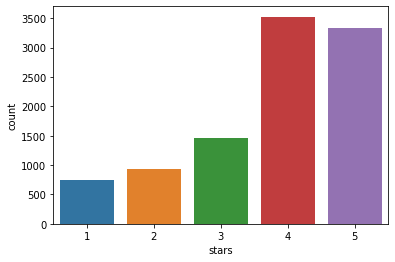

In [21]:
sns.countplot(x='stars',data=yelp_df)

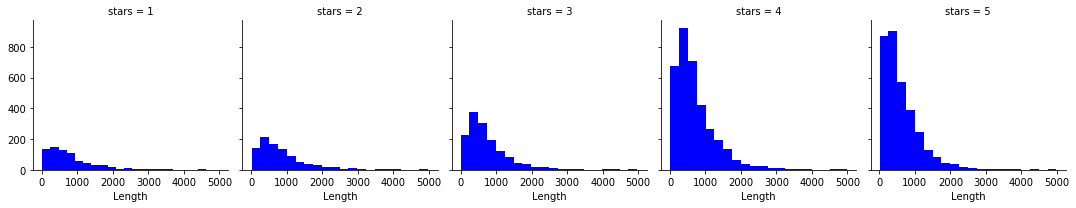

In [22]:
g= sns.FacetGrid(data=yelp_df, col= 'stars', col_wrap=5)
g.map(plt.hist, 'Length', bins=20 , color='b')

In [23]:
yelp_df_1= yelp_df[yelp_df['stars']==1]

In [24]:
yelp_df_1

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,Length
23,IJ0o6b8bJFAbG6MjGfBebQ,2010-09-05,Dx9sfFU6Zn0GYOckijom-g,1,U can go there n check the car out. If u wanna...,review,zRlQEDYd_HKp0VS3hnAffA,0,1,1,594
31,vvA3fbps4F9nGlAEYKk_sA,2012-05-04,S9OVpXat8k5YwWCn6FAgXg,1,Disgusting! Had a Groupon so my daughter and ...,review,8AMn6644NmBf96xGO3w6OA,0,1,0,361
35,o1GIYYZJjM6nM03fQs_uEQ,2011-11-30,ApKbwpYJdnhhgP4NbjQw2Q,1,"I've eaten here many times, but none as bad as...",review,iwUN95LIaEr75TZE_JC6bg,0,4,3,1198
61,l4vBbCL9QbGiwLuLKwD_bA,2011-11-22,DJVxOfj2Rw9zklC9tU3i1w,1,I have always been a fan of Burlington's deals...,review,EPROVap0M19Y6_4uf3eCmQ,0,0,0,569
64,CEswyP-9SsXRNLR9fFGKKw,2012-05-19,GXj4PNAi095-q9ynPYH3kg,1,Another night meeting friends here. I have to...,review,MjLAe48XNfYlTeFYca5gMw,0,1,2,498
65,6Ry-gjGqApTSRZkfdYlLmw,2011-05-04,LN4l4wklQB0IVBjm-vq9TA,1,Not busy at all but took nearly 45 min to get ...,review,rWN1pg3mCF2btJWtG6JmJA,0,1,0,304
71,NNGJQF3WeIHzGzweCpZ-VA,2011-04-23,jNewOjPp56NMDrKlajrgFQ,1,"Yikes, reading other reviews I realize my bad ...",review,5je-Jg8tq5BWxJtDBmTK2Q,0,6,1,877
79,FkHhy6kWeoJf0xJTqzRWmg,2012-09-17,odua8qFSMEXSFYmElQTspQ,1,This is my first year participating in Arizona...,review,68exKLCQnnZrvXNFOcIUnA,0,0,0,154
84,LzpR_jE6VIutJ08s2cdRrw,2009-03-18,EUCqs_gfKZi1YoKVkWjSYw,1,"really, I can't believe this place has receive...",review,HY9qpAamqLXFoa7xMwNntg,1,1,3,2646
89,145SQ_msdQ1yo7J0E63VoA,2011-03-15,VqNdpXrssjJrC0Z_swPUdA,1,"I was really excited about this event, maybe m...",review,ASi6ZgbbwXIwU2H24uANmQ,0,1,0,610


In [25]:
yelp_df_5= yelp_df[yelp_df['stars']==5]

In [26]:
yelp_df_5

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,Length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469
6,zp713qNhx8d9KCJJnrw1xA,2010-02-12,riFQ3vxNpP4rWLk_CSri2A,5,Drop what you're doing and drive here. After I...,review,wFweIWhv2fREZV_dYkz_1g,7,7,4,1565
9,nMHhuYan8e3cONo3PornJA,2010-08-11,jJAIXA46pU1swYyRCdfXtQ,5,Nobuo shows his unique talents with everything...,review,sUNkXg8-KFtCMQDV6zRzQg,0,1,0,186
10,AsSCv0q_BWqIe3mX2JqsOQ,2010-06-16,E11jzpKz9Kw5K7fuARWfRw,5,The oldish man who owns the store is as sweet ...,review,-OMlS6yWkYjVldNhC31wYg,1,3,1,298
11,e9nN4XxjdHj4qtKCOPq_vg,2011-10-21,3rPt0LxF7rgmEUrznoH22w,5,Wonderful Vietnamese sandwich shoppe. Their ba...,review,C1rHp3dmepNea7XiouwB6Q,1,1,0,321
12,h53YuCiIDfEFSJCQpk8v1g,2010-01-11,cGnKNX3I9rthE0-TH24-qA,5,They have a limited time thing going on right ...,review,UPtysDF6cUDUxq2KY-6Dcg,1,2,0,433
17,O510Re68mOy9dU490JTKCg,2010-05-03,j4SIzrIy0WrmW4yr4--Khg,5,okay this is the best place EVER! i grew up sh...,review,u1KWcbPMvXFEEYkZZ0Yktg,0,0,0,363


In [27]:
yelp_df_1_5= pd.concat([yelp_df_1,yelp_df_5])

In [28]:
yelp_df_1_5

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,Length
23,IJ0o6b8bJFAbG6MjGfBebQ,2010-09-05,Dx9sfFU6Zn0GYOckijom-g,1,U can go there n check the car out. If u wanna...,review,zRlQEDYd_HKp0VS3hnAffA,0,1,1,594
31,vvA3fbps4F9nGlAEYKk_sA,2012-05-04,S9OVpXat8k5YwWCn6FAgXg,1,Disgusting! Had a Groupon so my daughter and ...,review,8AMn6644NmBf96xGO3w6OA,0,1,0,361
35,o1GIYYZJjM6nM03fQs_uEQ,2011-11-30,ApKbwpYJdnhhgP4NbjQw2Q,1,"I've eaten here many times, but none as bad as...",review,iwUN95LIaEr75TZE_JC6bg,0,4,3,1198
61,l4vBbCL9QbGiwLuLKwD_bA,2011-11-22,DJVxOfj2Rw9zklC9tU3i1w,1,I have always been a fan of Burlington's deals...,review,EPROVap0M19Y6_4uf3eCmQ,0,0,0,569
64,CEswyP-9SsXRNLR9fFGKKw,2012-05-19,GXj4PNAi095-q9ynPYH3kg,1,Another night meeting friends here. I have to...,review,MjLAe48XNfYlTeFYca5gMw,0,1,2,498
65,6Ry-gjGqApTSRZkfdYlLmw,2011-05-04,LN4l4wklQB0IVBjm-vq9TA,1,Not busy at all but took nearly 45 min to get ...,review,rWN1pg3mCF2btJWtG6JmJA,0,1,0,304
71,NNGJQF3WeIHzGzweCpZ-VA,2011-04-23,jNewOjPp56NMDrKlajrgFQ,1,"Yikes, reading other reviews I realize my bad ...",review,5je-Jg8tq5BWxJtDBmTK2Q,0,6,1,877
79,FkHhy6kWeoJf0xJTqzRWmg,2012-09-17,odua8qFSMEXSFYmElQTspQ,1,This is my first year participating in Arizona...,review,68exKLCQnnZrvXNFOcIUnA,0,0,0,154
84,LzpR_jE6VIutJ08s2cdRrw,2009-03-18,EUCqs_gfKZi1YoKVkWjSYw,1,"really, I can't believe this place has receive...",review,HY9qpAamqLXFoa7xMwNntg,1,1,3,2646
89,145SQ_msdQ1yo7J0E63VoA,2011-03-15,VqNdpXrssjJrC0Z_swPUdA,1,"I was really excited about this event, maybe m...",review,ASi6ZgbbwXIwU2H24uANmQ,0,1,0,610


In [29]:
yelp_df_1_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4086 entries, 23 to 9999
Data columns (total 11 columns):
business_id    4086 non-null object
date           4086 non-null object
review_id      4086 non-null object
stars          4086 non-null int64
text           4086 non-null object
type           4086 non-null object
user_id        4086 non-null object
cool           4086 non-null int64
useful         4086 non-null int64
funny          4086 non-null int64
Length         4086 non-null int64
dtypes: int64(5), object(6)
memory usage: 383.1+ KB


In [30]:
print('1-star review percentage ', (len(yelp_df_1)/len(yelp_df_1_5))*100)

1-star review percentage  18.330885952031327


In [31]:
print('5-star review percentage ', (len(yelp_df_5)/len(yelp_df_1_5))*100)

5-star review percentage  81.66911404796868


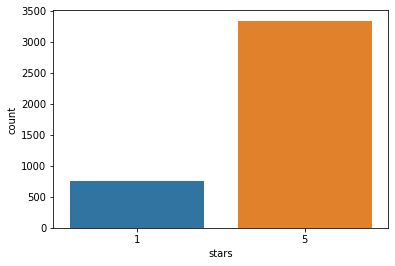

In [32]:
sns.countplot(yelp_df_1_5['stars'],label= 'Count')

## Step 3 : Data Cleaning

In [33]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [2]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [35]:
def message_cleaning(message):
    text_punc_removed= [char for char in message if char not in string.punctuation]
    text_punc_removed_join= ''.join(text_punc_removed)
    text_punc_removed_clean = [word for word in text_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return text_punc_removed_clean

In [37]:
yelp_df_clean= yelp_df_1_5['text'].apply(message_cleaning)

In [38]:
print(yelp_df_clean[0])

['wife', 'took', 'birthday', 'breakfast', 'excellent', 'weather', 'perfect', 'made', 'sitting', 'outside', 'overlooking', 'grounds', 'absolute', 'pleasure', 'waitress', 'excellent', 'food', 'arrived', 'quickly', 'semibusy', 'Saturday', 'morning', 'looked', 'like', 'place', 'fills', 'pretty', 'quickly', 'earlier', 'get', 'better', 'favor', 'get', 'Bloody', 'Mary', 'phenomenal', 'simply', 'best', 'Ive', 'ever', 'Im', 'pretty', 'sure', 'use', 'ingredients', 'garden', 'blend', 'fresh', 'order', 'amazing', 'EVERYTHING', 'menu', 'looks', 'excellent', 'white', 'truffle', 'scrambled', 'eggs', 'vegetable', 'skillet', 'tasty', 'delicious', 'came', '2', 'pieces', 'griddled', 'bread', 'amazing', 'absolutely', 'made', 'meal', 'complete', 'best', 'toast', 'Ive', 'ever', 'Anyway', 'cant', 'wait', 'go', 'back']


In [40]:
print(yelp_df_1_5['text'][0])

My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.

Do yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I've ever had.  I'm pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.

While EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I've ever had.

Anyway, I can't wait to go back!


In [45]:
yelp_df_1_5['Length'].describe()

count    4086.000000
mean      661.938815
std       601.621371
min         6.000000
25%       256.000000
50%       489.500000
75%       878.000000
max      4986.000000
Name: Length, dtype: float64

In [46]:
yelp_df_1_5[yelp_df_1_5['Length']==662]['text'].iloc[0]

"Coming from a French family on my mom's side it is ingrained in my genes to love cooking, food, and shops like Sur La Table...oh and also wine and cheese...what a tough life I live!\n\nSur La Table is a classy cooking shop which offers high end cooking ware, appliances, and also dishes. Somethings in the store can be pricey, but you can also find good deals as well. They offer many cooking things you wouldn't find at your average Crate and Barrel for more complicated cooking endeavors. I have also found some cute cookie cutters here for my mom's collection. The staff was all very helpful and knowledgeable. and many Sur La Table's now offer cooking classes!"

In [47]:
yelp_df_1_5[yelp_df_1_5['Length']==662]['text']

3571    Coming from a French family on my mom's side i...
7169    Habaneros is an awesome little gem stuck in th...
Name: text, dtype: object

In [49]:
print(yelp_df_clean[3571])

['Coming', 'French', 'family', 'moms', 'side', 'ingrained', 'genes', 'love', 'cooking', 'food', 'shops', 'like', 'Sur', 'La', 'Tableoh', 'also', 'wine', 'cheesewhat', 'tough', 'life', 'live', 'Sur', 'La', 'Table', 'classy', 'cooking', 'shop', 'offers', 'high', 'end', 'cooking', 'ware', 'appliances', 'also', 'dishes', 'Somethings', 'store', 'pricey', 'also', 'find', 'good', 'deals', 'well', 'offer', 'many', 'cooking', 'things', 'wouldnt', 'find', 'average', 'Crate', 'Barrel', 'complicated', 'cooking', 'endeavors', 'also', 'found', 'cute', 'cookie', 'cutters', 'moms', 'collection', 'staff', 'helpful', 'knowledgeable', 'many', 'Sur', 'La', 'Tables', 'offer', 'cooking', 'classes']


## Apply Count Vectorizer to Yelp review

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer= CountVectorizer(analyzer= message_cleaning)
yelp_countvectorizer= vectorizer.fit_transform(yelp_df_1_5['text'])

In [54]:
print(vectorizer.get_feature_names())

['0', '00s', '01042012', '022010', '03342', '05', '050', '06', '07092008', '075', '09', '090', '095', '1', '10', '100', '1000', '10000', '1000am', '1000pm', '1000x', '1001', '100150', '1007', '100s', '100th', '101', '1011', '1012', '101412', '1015', '102', '1025', '1030', '103011', '1030pm', '10312012', '105', '105°', '1070', '108', '109', '1095', '1099', '10Shrimp', '10X', '10am', '10am4pm', '10close', '10each', '10gallon', '10ish', '10min', '10mins', '10minutes', '10person', '10pm', '10pm12am', '10th', '10thand', '10yard', '10yo', '11', '110', '1100', '1100am', '1103', '111', '1113', '1115', '1118', '111807', '111809', '111909', '111PM', '111th', '112', '112312', '1125', '1130', '1130am', '1135', '1139', '114', '1141', '1145', '115', '1150', '1152', '1154', '1155', '115th', '116', '118', '1182010', '1199', '11991079', '11AM', '11PM', '11a3p', '11am', '11ish', '11person', '11pm', '12', '120', '1200', '12000', '1205', '1207', '120year', '121007', '121107', '121207', '1213', '121407', '

## Training the model

In [67]:
X= yelp_countvectorizer
y=label

In [68]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size= 0.2)

In [69]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()


In [70]:
NB_classifier.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Model Evaluation

In [73]:
from sklearn.metrics import confusion_matrix, classification_report
y_predict_train = NB_classifier.predict(X_train)
y_predict_train

array([5, 5, 5, ..., 5, 1, 1], dtype=int64)

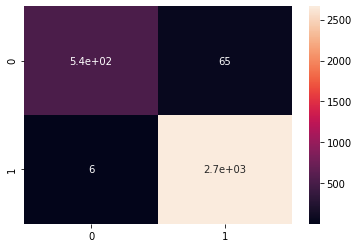

In [74]:
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot = True)

In [75]:
y_predict_test = NB_classifier.predict(X_test)
y_predict_test

array([5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 1, 5, 5, 1, 5, 1, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 1, 5, 1, 5, 5, 1,
       5, 5, 5, 5, 5, 1, 5, 5, 1, 5, 1, 5, 5, 5, 5, 5, 1, 5, 5, 1, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 1, 5, 5, 5, 1, 5, 5, 5, 5, 5, 1,
       5, 5, 1, 5, 5, 5, 1, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 1, 5, 5, 5,
       5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 1,
       5, 1, 5, 5, 5, 1, 1, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 1,
       1, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 1, 5, 1, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 1, 5, 1, 1, 5, 5, 5, 5,
       1, 1, 5, 1, 5, 5, 1, 5, 5, 5, 1, 1, 5, 5, 5, 1, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,

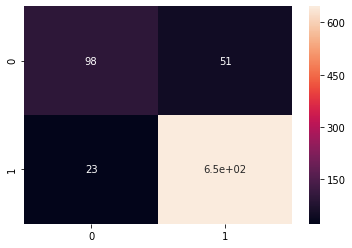

In [76]:
cm_test = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm_test, annot = True)

In [77]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           1       0.81      0.66      0.73       149
           5       0.93      0.97      0.95       669

    accuracy                           0.91       818
   macro avg       0.87      0.81      0.84       818
weighted avg       0.91      0.91      0.91       818

